# Dados e Aprendizagem Automática
## Produção Energética e Sustentabilidade


**Dataset:** .csv

**Problema:** Prever a quantidade de energia, em kWh, produzida por painéis solares e injectada, em redes elétricas, a cada hora do dia.
___
**Features dos Datasets de Energia:**

* Data - o timestamp associado ao registo, ao dia;
* Hora - a hora associada ao registo;
* Normal (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
* Horário Económico (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
* Autoconsumo (kWh) - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
* Injeção na rede (kWh) - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

**Features dos Datasets Meteorológicos:**

* dt - o timestamp associado ao registo;
* dt_iso - a data associada ao registo, ao segundo;
* city_name - o local em causa;
* temp - temperatura em ºC;
* feels_like - sensação térmica em ºC;
* temp_min - temperatura mínima sentida em ºC;
* temp_max - temperatura máxima sentida em ºC;
* pressure - pressão atmosférica sentida em atm;
* sea_level - pressão atmosférica sentida ao nível do mar em atm;
* grnd_level - pressão atmosférica sentida à altitude local em atm;
* humidity - humidade em percentagem;
* wind_speed - velocidade do vento em metros por segundo;
* rain_1h - valor médio de precipitação;
* clouds_all - nível de nebulosidade em percentagem;
* weather_description - avaliação qualitativa do estado do tempo.

___
**Grupo:**
- João Paulo Machado Abreu - pg53928
- João Pedro Dias Faria - pg53939
- Ricardo Cardoso Sousa - pg54179
- Rui Pedro Guise da Silva - pg54213


### Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
%matplotlib inline

##### Concat dos dois datasets para treino da energia

In [2]:
df2021 = pd.read_csv('./datasets/competicao/energia_202109-202112.csv')
df2022 = pd.read_csv('./datasets/competicao/energia_202201-202212.csv')

df_energia_train = pd.concat([df2021, df2022], ignore_index=True)
df_energia_teste = pd.read_csv('./datasets/competicao/energia_202301-202304.csv')

##### Adicionar uma coluna com o timestamp em segundos

In [3]:
df_energia_train['dt'] = pd.to_datetime(df_energia_train['Data'] + ' ' + df_energia_train['Hora'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')
df_energia_teste['dt'] = pd.to_datetime(df_energia_teste['Data'] + ' ' + df_energia_teste['Hora'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

def create_timestamp(row):
    timestamp_str = str(row['dt'])
    timestamp= datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
    timestamp_utc = timestamp.replace(tzinfo=timezone.utc)
    return int(timestamp_utc.timestamp())

df_energia_train['dt'] = df_energia_train.apply(create_timestamp, axis=1)
df_energia_teste['dt'] = df_energia_teste.apply(create_timestamp, axis=1)

##### Concat dos dois datasets para treino da meteorologia

In [4]:
dfm2021 = pd.read_csv('./datasets/competicao/meteo_202109-202112.csv')
dfm2022 = pd.read_csv('./datasets/competicao/meteo_202201-202212.csv')

df_meteo_train = pd.concat([dfm2021, dfm2022], ignore_index=True)
df_meteo_teste = pd.read_csv('./datasets/competicao/meteo_202301-202304.csv')

##### Join do dataset de energia com o de meteorologia

In [5]:
df_train = pd.merge(df_energia_train, df_meteo_train, left_on='dt', right_on='dt', how='inner')

df_teste = pd.merge(df_energia_teste, df_meteo_teste, left_on='dt', right_on='dt', how='left')

In [6]:
df_meteo_emfalta = pd.read_csv('./Braga 2023-03-14 to 2023-04-05.csv')
df_meteo_emfalta

datetime  temp  feelslike  humidity  precip  windspeed  \
0    2023-03-14T00:00:00  11.6       11.6     88.32   0.125        8.7   
1    2023-03-14T01:00:00  11.7       11.7     83.32   0.000        8.2   
2    2023-03-14T02:00:00   9.9        9.6     88.24   0.000        5.2   
3    2023-03-14T03:00:00  10.0       10.0     92.90   0.000        0.4   
4    2023-03-14T04:00:00   9.1        9.1     98.79   0.000        0.7   
..                   ...   ...        ...       ...     ...        ...   
546  2023-04-05T19:00:00  17.0       17.0     50.39   0.000       15.2   
547  2023-04-05T20:00:00  14.2       14.2     58.83   0.000       10.9   
548  2023-04-05T21:00:00  14.1       14.1     59.59   0.000       15.5   
549  2023-04-05T22:00:00  13.0       13.0     69.75   0.000        9.1   
550  2023-04-05T23:00:00  13.0       13.0     69.57   0.000        2.5   

     sealevelpressure  cloudcover  
0              1022.1        36.4  
1              1022.1        27.6  
2              1023.0        27.6  
3              1022.0        36.4  
4              1022.0        27.6  
..                ...         ...  
546            1016.1        30.0  
547            1016.2        87.2  
548            1017.1        86.6  
549            1017.2        30.0  
550            1017.2        96.0  

[551 rows x 8 columns]

In [7]:
df_meteo_emfalta['dt'] = pd.to_datetime(df_meteo_emfalta['datetime'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
df_meteo_emfalta['dt'] = df_meteo_emfalta.apply(create_timestamp, axis=1)

In [9]:
df_meteo_emfalta.head()

datetime  temp  feelslike  humidity  precip  windspeed  \
0  2023-03-14T00:00:00  11.6       11.6     88.32   0.125        8.7   
1  2023-03-14T01:00:00  11.7       11.7     83.32   0.000        8.2   
2  2023-03-14T02:00:00   9.9        9.6     88.24   0.000        5.2   
3  2023-03-14T03:00:00  10.0       10.0     92.90   0.000        0.4   
4  2023-03-14T04:00:00   9.1        9.1     98.79   0.000        0.7   

   sealevelpressure  cloudcover          dt  
0            1022.1        36.4  1678752000  
1            1022.1        27.6  1678755600  
2            1023.0        27.6  1678759200  
3            1022.0        36.4  1678762800  
4            1022.0        27.6  1678766400

In [10]:
df_meteo_emfalta.isna().sum()

datetime            0
temp                0
feelslike           0
humidity            0
precip              0
windspeed           0
sealevelpressure    0
cloudcover          0
dt                  0
dtype: int64

In [25]:
df_teste_v1 = pd.merge(df_teste, df_meteo_emfalta, left_on='dt', right_on='dt', how='left')

In [26]:
df_teste_v1['temp_x'] = df_teste_v1['temp_x'].fillna(df_teste_v1['temp_y'])
df_teste_v1['feels_like'] = df_teste_v1['feels_like'].fillna(df_teste_v1['feelslike'])
df_teste_v1['humidity_x'] = df_teste_v1['humidity_x'].fillna(df_teste_v1['humidity_y'])
df_teste_v1['wind_speed'] = df_teste_v1['wind_speed'].fillna(df_teste_v1['windspeed'])
df_teste_v1['clouds_all'] = df_teste_v1['clouds_all'].fillna(df_teste_v1['cloudcover'])

In [27]:
df_teste_v1.drop(['datetime'], axis=1, inplace=True)
df_teste_v1.drop(['temp_y'], axis=1, inplace=True)
df_teste_v1.drop(['feelslike'], axis=1, inplace=True)
df_teste_v1.drop(['humidity_y'], axis=1, inplace=True)
df_teste_v1.drop(['precip'], axis=1, inplace=True)
df_teste_v1.drop(['windspeed'], axis=1, inplace=True)
df_teste_v1.drop(['sealevelpressure'], axis=1, inplace=True)
df_teste_v1.drop(['cloudcover'], axis=1, inplace=True)

### Ver e compreender dados

In [28]:
df_train.shape

(11016, 21)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
 6   dt                       11016 non-null  int64  
 7   dt_iso                   11016 non-null  object 
 8   city_name                11016 non-null  object 
 9   temp                     11016 non-null  float64
 10  feels_like               11016 non-null  float64
 11  temp_min                 11016 non-null  float64
 12  temp_max                 11016 non-null  float64
 13  pressure                 11016 non-null  int64  
 14  sea_level             

In [30]:
df_train.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)          dt                         dt_iso city_name  \
0                   NaN  1632873600  2021-09-29 00:00:00 +0000 UTC     local   
1                   NaN  1632877200  2021-09-29 01:00:00 +0000 UTC     local   
2                   NaN  1632880800  2021-09-29 02:00:00 +0000 UTC     local   
3                   NaN  1632884400  2021-09-29 03:00:00 +0000 UTC     local   
4                   NaN  1632888000  2021-09-29 04:00:00 +0000 UTC     local   

    temp  ...  temp_min  temp_max  pressure  sea_level  grnd_level  humidity  \
0  13.97  ...     11.45     14.04      1027        NaN         NaN        81   
1  13.48  ...     13.43     13.90      1028        NaN         NaN        82   
2  12.93  ...     12.72     13.43      1027        NaN         NaN        84   
3  12.61  ...     10.34     12.93      1027        NaN         NaN        85   
4  12.61  ...      9.79     12.93      1027        NaN         NaN        86   

   wind_speed  rain_1h  clouds_all  weather_description  
0        1.96      NaN          87      overcast clouds  
1        1.83      NaN          91      overcast clouds  
2        1.96      NaN          93      overcast clouds  
3        1.85      NaN          95      overcast clouds  
4        1.83      NaN          93      overcast clouds  

[5 rows x 21 columns]

In [31]:
df_train.describe()

Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
count  11016.000000  11016.000000             11016.000000       11016.000000   
mean      11.500000      0.202278                 0.159714           0.117314   
std        6.922501      0.349478                 0.271792           0.176762   
min        0.000000      0.000000                 0.000000           0.000000   
25%        5.750000      0.000000                 0.000000           0.000000   
50%       11.500000      0.000000                 0.000000           0.000000   
75%       17.250000      0.314000                 0.288000           0.227000   
max       23.000000      3.251000                 6.978000           1.192000   

                 dt          temp    feels_like      temp_min      temp_max  \
count  1.101600e+04  11016.000000  11016.000000  11016.000000  11016.000000   
mean   1.652701e+09     16.182991     15.826868     14.195064     17.288098   
std    1.144868e+07      5.756972      6.264860      4.956014      6.164689   
min    1.632874e+09      0.320000     -2.190000     -0.640000      1.330000   
25%    1.642787e+09     12.080000     11.507500     10.720000     12.890000   
50%    1.652701e+09     15.625000     15.230000     14.230000     16.260000   
75%    1.662614e+09     19.270000     19.260000     17.490000     20.340000   
max    1.672528e+09     40.850000     41.330000     36.720000     41.450000   

           pressure  sea_level  grnd_level      humidity    wind_speed  \
count  11016.000000        0.0         0.0  11016.000000  11016.000000   
mean    1018.396605        NaN         NaN     76.570715      2.672039   
std        6.203379        NaN         NaN     16.268260      1.476158   
min      994.000000        NaN         NaN     19.000000      0.060000   
25%     1015.000000        NaN         NaN     66.000000      1.620000   
50%     1018.000000        NaN         NaN     81.000000      2.400000   
75%     1022.000000        NaN         NaN     91.000000      3.420000   
max     1034.000000        NaN         NaN    100.000000     11.100000   

           rain_1h    clouds_all  
count  2284.000000  11016.000000  
mean      0.896642     54.000908  
std       1.079381     40.553002  
min       0.100000      0.000000  
25%       0.210000      7.000000  
50%       0.460000     60.000000  
75%       1.092500     98.000000  
max       7.450000    100.000000

In [32]:
print(df_train.isna().sum())

Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)       7777
dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
dtype: int64


In [33]:
print(df_train.duplicated().sum())

0


### Qualidade dos dados

Verificar missing values em ambos os dataframes

<Axes: >

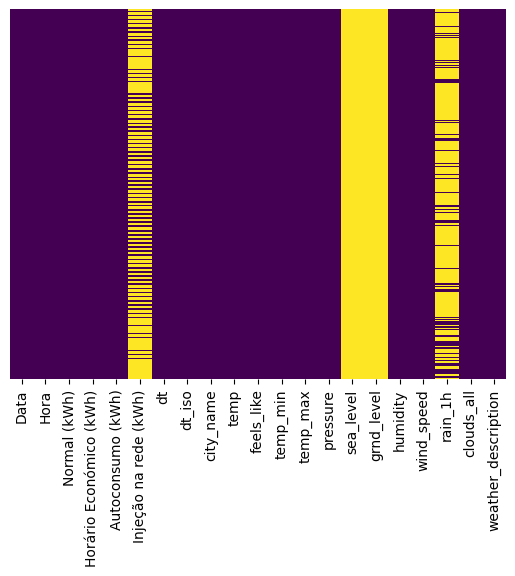

In [34]:
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

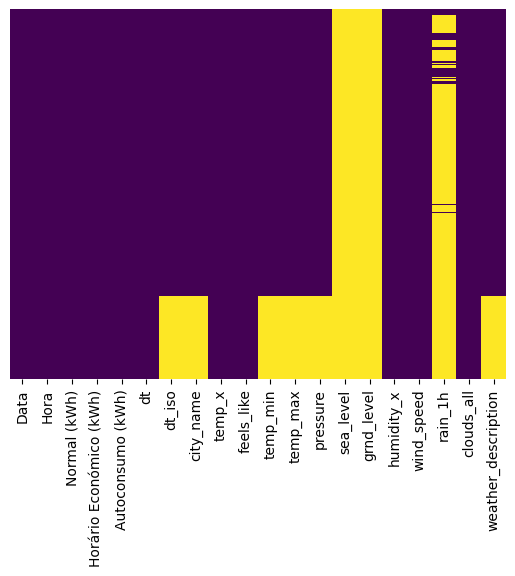

In [35]:
sns.heatmap(df_teste_v1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Nuvens')

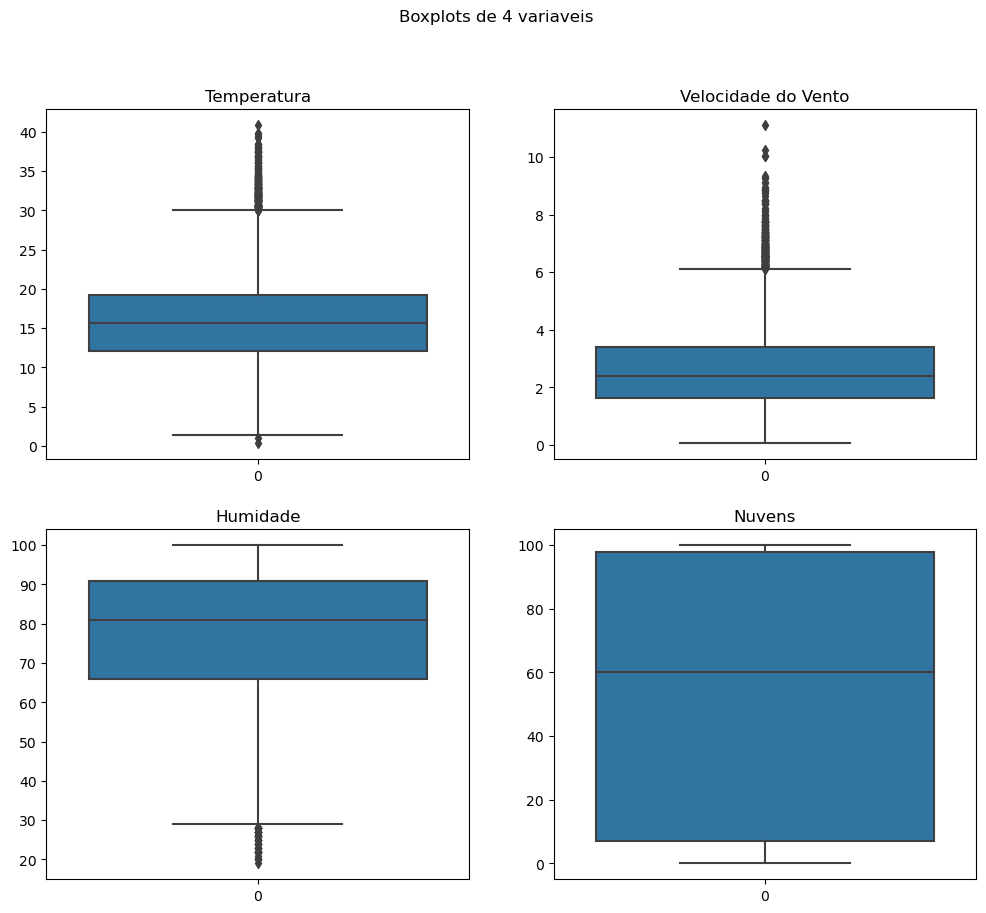

In [36]:
fig,axs=plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Boxplots de 4 variaveis')
sns.boxplot(data=df_train['temp'],ax=axs[0,0])
axs[0, 0].set_title('Temperatura')
sns.boxplot(data=df_train['wind_speed'],ax=axs[0,1])
axs[0, 1].set_title('Velocidade do Vento')
sns.boxplot(data=df_train['humidity'],ax=axs[1,0])
axs[1, 0].set_title('Humidade')
sns.boxplot(data=df_train['clouds_all'],ax=axs[1,1])
axs[1, 1].set_title('Nuvens')

Verificar se existe registos repetidos

In [37]:
df_train.duplicated().sum()

0

### Exploração dos dados

In [38]:
df_train.describe()

Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
count  11016.000000  11016.000000             11016.000000       11016.000000   
mean      11.500000      0.202278                 0.159714           0.117314   
std        6.922501      0.349478                 0.271792           0.176762   
min        0.000000      0.000000                 0.000000           0.000000   
25%        5.750000      0.000000                 0.000000           0.000000   
50%       11.500000      0.000000                 0.000000           0.000000   
75%       17.250000      0.314000                 0.288000           0.227000   
max       23.000000      3.251000                 6.978000           1.192000   

                 dt          temp    feels_like      temp_min      temp_max  \
count  1.101600e+04  11016.000000  11016.000000  11016.000000  11016.000000   
mean   1.652701e+09     16.182991     15.826868     14.195064     17.288098   
std    1.144868e+07      5.756972      6.264860      4.956014      6.164689   
min    1.632874e+09      0.320000     -2.190000     -0.640000      1.330000   
25%    1.642787e+09     12.080000     11.507500     10.720000     12.890000   
50%    1.652701e+09     15.625000     15.230000     14.230000     16.260000   
75%    1.662614e+09     19.270000     19.260000     17.490000     20.340000   
max    1.672528e+09     40.850000     41.330000     36.720000     41.450000   

           pressure  sea_level  grnd_level      humidity    wind_speed  \
count  11016.000000        0.0         0.0  11016.000000  11016.000000   
mean    1018.396605        NaN         NaN     76.570715      2.672039   
std        6.203379        NaN         NaN     16.268260      1.476158   
min      994.000000        NaN         NaN     19.000000      0.060000   
25%     1015.000000        NaN         NaN     66.000000      1.620000   
50%     1018.000000        NaN         NaN     81.000000      2.400000   
75%     1022.000000        NaN         NaN     91.000000      3.420000   
max     1034.000000        NaN         NaN    100.000000     11.100000   

           rain_1h    clouds_all  
count  2284.000000  11016.000000  
mean      0.896642     54.000908  
std       1.079381     40.553002  
min       0.100000      0.000000  
25%       0.210000      7.000000  
50%       0.460000     60.000000  
75%       1.092500     98.000000  
max       7.450000    100.000000

Correlação entre as variáveis

In [39]:
"""
fig = plt.figure(figsize=(10,10))
inj_corr = df_train.corr(method='pearson')
sns.heatmap(inj_corr,linecolor='black',linewidth=0.5)
"""

"\nfig = plt.figure(figsize=(10,10))\ninj_corr = df_train.corr(method='pearson')\nsns.heatmap(inj_corr,linecolor='black',linewidth=0.5)\n"

## Preparação e transformação de dados

### Lidar com datas

In [40]:
df_train['Data'].head()

0    2021-09-29
1    2021-09-29
2    2021-09-29
3    2021-09-29
4    2021-09-29
Name: Data, dtype: object

In [41]:
df_train['Data'] = pd.to_datetime(df_train['Data'], format='%Y-%m-%d', errors='coerce')

In [45]:
df_teste['Data'] = pd.to_datetime(df_teste['Data'], format='%Y-%m-%d', errors='coerce')

In [42]:
df_teste_v1['Data'] = pd.to_datetime(df_teste_v1['Data'], format='%Y-%m-%d', errors='coerce')

In [43]:
df_train['date_year'] = df_train['Data'].dt.year
df_train['date_month'] = df_train['Data'].dt.month
df_train['date_day'] = df_train['Data'].dt.day
df_train['date_hour'] = df_train['Hora']
df_train.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0 2021-09-29     0           0.0                      0.0                0.0   
1 2021-09-29     1           0.0                      0.0                0.0   
2 2021-09-29     2           0.0                      0.0                0.0   
3 2021-09-29     3           0.0                      0.0                0.0   
4 2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)          dt                         dt_iso city_name  \
0                   NaN  1632873600  2021-09-29 00:00:00 +0000 UTC     local   
1                   NaN  1632877200  2021-09-29 01:00:00 +0000 UTC     local   
2                   NaN  1632880800  2021-09-29 02:00:00 +0000 UTC     local   
3                   NaN  1632884400  2021-09-29 03:00:00 +0000 UTC     local   
4                   NaN  1632888000  2021-09-29 04:00:00 +0000 UTC     local   

    temp  ...  grnd_level  humidity  wind_speed  rain_1h  clouds_all  \
0  13.97  ...         NaN        81        1.96      NaN          87   
1  13.48  ...         NaN        82        1.83      NaN          91   
2  12.93  ...         NaN        84        1.96      NaN          93   
3  12.61  ...         NaN        85        1.85      NaN          95   
4  12.61  ...         NaN        86        1.83      NaN          93   

   weather_description  date_year  date_month  date_day  date_hour  
0      overcast clouds       2021           9        29          0  
1      overcast clouds       2021           9        29          1  
2      overcast clouds       2021           9        29          2  
3      overcast clouds       2021           9        29          3  
4      overcast clouds       2021           9        29          4  

[5 rows x 25 columns]

In [46]:
df_teste['date_year'] = df_teste['Data'].dt.year
df_teste['date_month'] = df_teste['Data'].dt.month
df_teste['date_day'] = df_teste['Data'].dt.day
df_teste['date_hour'] = df_teste['Hora']
df_teste.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0 2023-01-01     0           0.0                    0.467                0.0   
1 2023-01-01     1           0.0                    0.577                0.0   
2 2023-01-01     2           0.0                    0.346                0.0   
3 2023-01-01     3           0.0                    0.270                0.0   
4 2023-01-01     4           0.0                    0.252                0.0   

           dt                         dt_iso city_name   temp  feels_like  \
0  1672531200  2023-01-01 00:00:00 +0000 UTC     local  12.93       12.76   
1  1672534800  2023-01-01 01:00:00 +0000 UTC     local  13.49       13.38   
2  1672538400  2023-01-01 02:00:00 +0000 UTC     local  13.55       13.44   
3  1672542000  2023-01-01 03:00:00 +0000 UTC     local  13.61       13.51   
4  1672545600  2023-01-01 04:00:00 +0000 UTC     local  13.59       13.49   

   ...  grnd_level  humidity  wind_speed  rain_1h  clouds_all  \
0  ...         NaN      95.0        2.02     3.72       100.0   
1  ...         NaN      95.0        2.18     3.26       100.0   
2  ...         NaN      95.0        2.88     2.44       100.0   
3  ...         NaN      95.0        3.63     1.74       100.0   
4  ...         NaN      95.0        4.58     1.13       100.0   

   weather_description  date_year  date_month  date_day date_hour  
0        moderate rain       2023           1         1         0  
1        moderate rain       2023           1         1         1  
2        moderate rain       2023           1         1         2  
3        moderate rain       2023           1         1         3  
4        moderate rain       2023           1         1         4  

[5 rows x 24 columns]

In [47]:
df_teste_v1['date_year'] = df_teste_v1['Data'].dt.year
df_teste_v1['date_month'] = df_teste_v1['Data'].dt.month
df_teste_v1['date_day'] = df_teste_v1['Data'].dt.day
df_teste_v1['date_hour'] = df_teste_v1['Hora']
df_teste_v1.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0 2023-01-01     0           0.0                    0.467                0.0   
1 2023-01-01     1           0.0                    0.577                0.0   
2 2023-01-01     2           0.0                    0.346                0.0   
3 2023-01-01     3           0.0                    0.270                0.0   
4 2023-01-01     4           0.0                    0.252                0.0   

           dt                         dt_iso city_name  temp_x  feels_like  \
0  1672531200  2023-01-01 00:00:00 +0000 UTC     local   12.93       12.76   
1  1672534800  2023-01-01 01:00:00 +0000 UTC     local   13.49       13.38   
2  1672538400  2023-01-01 02:00:00 +0000 UTC     local   13.55       13.44   
3  1672542000  2023-01-01 03:00:00 +0000 UTC     local   13.61       13.51   
4  1672545600  2023-01-01 04:00:00 +0000 UTC     local   13.59       13.49   

   ...  grnd_level  humidity_x  wind_speed  rain_1h  clouds_all  \
0  ...         NaN        95.0        2.02     3.72       100.0   
1  ...         NaN        95.0        2.18     3.26       100.0   
2  ...         NaN        95.0        2.88     2.44       100.0   
3  ...         NaN        95.0        3.63     1.74       100.0   
4  ...         NaN        95.0        4.58     1.13       100.0   

   weather_description  date_year  date_month  date_day date_hour  
0        moderate rain       2023           1         1         0  
1        moderate rain       2023           1         1         1  
2        moderate rain       2023           1         1         2  
3        moderate rain       2023           1         1         3  
4        moderate rain       2023           1         1         4  

[5 rows x 24 columns]

In [48]:
df_train.drop('Data', axis=1, inplace=True)
df_train.drop('Hora', axis=1, inplace=True)
df_train.head()

Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0           0.0                      0.0                0.0   
1           0.0                      0.0                0.0   
2           0.0                      0.0                0.0   
3           0.0                      0.0                0.0   
4           0.0                      0.0                0.0   

  Injeção na rede (kWh)          dt                         dt_iso city_name  \
0                   NaN  1632873600  2021-09-29 00:00:00 +0000 UTC     local   
1                   NaN  1632877200  2021-09-29 01:00:00 +0000 UTC     local   
2                   NaN  1632880800  2021-09-29 02:00:00 +0000 UTC     local   
3                   NaN  1632884400  2021-09-29 03:00:00 +0000 UTC     local   
4                   NaN  1632888000  2021-09-29 04:00:00 +0000 UTC     local   

    temp  feels_like  temp_min  ...  grnd_level  humidity  wind_speed  \
0  13.97       13.54     11.45  ...         NaN        81        1.96   
1  13.48       13.02     13.43  ...         NaN        82        1.83   
2  12.93       12.47     12.72  ...         NaN        84        1.96   
3  12.61       12.15     10.34  ...         NaN        85        1.85   
4  12.61       12.17      9.79  ...         NaN        86        1.83   

   rain_1h  clouds_all  weather_description  date_year  date_month date_day  \
0      NaN          87      overcast clouds       2021           9       29   
1      NaN          91      overcast clouds       2021           9       29   
2      NaN          93      overcast clouds       2021           9       29   
3      NaN          95      overcast clouds       2021           9       29   
4      NaN          93      overcast clouds       2021           9       29   

   date_hour  
0          0  
1          1  
2          2  
3          3  
4          4  

[5 rows x 23 columns]

In [49]:
df_teste.drop('Data', axis=1, inplace=True)
df_teste.drop('Hora', axis=1, inplace=True)
df_teste.head()

Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)          dt  \
0           0.0                    0.467                0.0  1672531200   
1           0.0                    0.577                0.0  1672534800   
2           0.0                    0.346                0.0  1672538400   
3           0.0                    0.270                0.0  1672542000   
4           0.0                    0.252                0.0  1672545600   

                          dt_iso city_name   temp  feels_like  temp_min  \
0  2023-01-01 00:00:00 +0000 UTC     local  12.93       12.76     12.72   
1  2023-01-01 01:00:00 +0000 UTC     local  13.49       13.38     13.43   
2  2023-01-01 02:00:00 +0000 UTC     local  13.55       13.44     13.48   
3  2023-01-01 03:00:00 +0000 UTC     local  13.61       13.51     12.01   
4  2023-01-01 04:00:00 +0000 UTC     local  13.59       13.49     12.01   

   temp_max  ...  grnd_level  humidity  wind_speed  rain_1h  clouds_all  \
0     13.43  ...         NaN      95.0        2.02     3.72       100.0   
1     13.90  ...         NaN      95.0        2.18     3.26       100.0   
2     14.82  ...         NaN      95.0        2.88     2.44       100.0   
3     14.82  ...         NaN      95.0        3.63     1.74       100.0   
4     14.82  ...         NaN      95.0        4.58     1.13       100.0   

   weather_description  date_year date_month  date_day  date_hour  
0        moderate rain       2023          1         1          0  
1        moderate rain       2023          1         1          1  
2        moderate rain       2023          1         1          2  
3        moderate rain       2023          1         1          3  
4        moderate rain       2023          1         1          4  

[5 rows x 22 columns]

In [50]:
df_teste_v1.drop('Data', axis=1, inplace=True)
df_teste_v1.drop('Hora', axis=1, inplace=True)
df_teste_v1.head()

Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)          dt  \
0           0.0                    0.467                0.0  1672531200   
1           0.0                    0.577                0.0  1672534800   
2           0.0                    0.346                0.0  1672538400   
3           0.0                    0.270                0.0  1672542000   
4           0.0                    0.252                0.0  1672545600   

                          dt_iso city_name  temp_x  feels_like  temp_min  \
0  2023-01-01 00:00:00 +0000 UTC     local   12.93       12.76     12.72   
1  2023-01-01 01:00:00 +0000 UTC     local   13.49       13.38     13.43   
2  2023-01-01 02:00:00 +0000 UTC     local   13.55       13.44     13.48   
3  2023-01-01 03:00:00 +0000 UTC     local   13.61       13.51     12.01   
4  2023-01-01 04:00:00 +0000 UTC     local   13.59       13.49     12.01   

   temp_max  ...  grnd_level  humidity_x  wind_speed  rain_1h  clouds_all  \
0     13.43  ...         NaN        95.0        2.02     3.72       100.0   
1     13.90  ...         NaN        95.0        2.18     3.26       100.0   
2     14.82  ...         NaN        95.0        2.88     2.44       100.0   
3     14.82  ...         NaN        95.0        3.63     1.74       100.0   
4     14.82  ...         NaN        95.0        4.58     1.13       100.0   

   weather_description  date_year date_month  date_day  date_hour  
0        moderate rain       2023          1         1          0  
1        moderate rain       2023          1         1          1  
2        moderate rain       2023          1         1          2  
3        moderate rain       2023          1         1          3  
4        moderate rain       2023          1         1          4  

[5 rows x 22 columns]

### Drop or fill

In [51]:
df_train.drop(['sea_level'], axis=1, inplace=True)
df_train.drop(['grnd_level'], axis=1, inplace=True)
df_train.drop(['dt'], axis=1, inplace=True)
df_train.drop(['dt_iso'], axis=1, inplace=True)
df_train.head()

Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0           0.0                      0.0                0.0   
1           0.0                      0.0                0.0   
2           0.0                      0.0                0.0   
3           0.0                      0.0                0.0   
4           0.0                      0.0                0.0   

  Injeção na rede (kWh) city_name   temp  feels_like  temp_min  temp_max  \
0                   NaN     local  13.97       13.54     11.45     14.04   
1                   NaN     local  13.48       13.02     13.43     13.90   
2                   NaN     local  12.93       12.47     12.72     13.43   
3                   NaN     local  12.61       12.15     10.34     12.93   
4                   NaN     local  12.61       12.17      9.79     12.93   

   pressure  humidity  wind_speed  rain_1h  clouds_all weather_description  \
0      1027        81        1.96      NaN          87     overcast clouds   
1      1028        82        1.83      NaN          91     overcast clouds   
2      1027        84        1.96      NaN          93     overcast clouds   
3      1027        85        1.85      NaN          95     overcast clouds   
4      1027        86        1.83      NaN          93     overcast clouds   

   date_year  date_month  date_day  date_hour  
0       2021           9        29          0  
1       2021           9        29          1  
2       2021           9        29          2  
3       2021           9        29          3  
4       2021           9        29          4

In [52]:
df_teste.drop(['sea_level'], axis=1, inplace=True)
df_teste.drop(['grnd_level'], axis=1, inplace=True)
df_teste.drop(['dt'], axis=1, inplace=True)
df_teste.drop(['dt_iso'], axis=1, inplace=True)
df_teste.head()

Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh) city_name   temp  \
0           0.0                    0.467                0.0     local  12.93   
1           0.0                    0.577                0.0     local  13.49   
2           0.0                    0.346                0.0     local  13.55   
3           0.0                    0.270                0.0     local  13.61   
4           0.0                    0.252                0.0     local  13.59   

   feels_like  temp_min  temp_max  pressure  humidity  wind_speed  rain_1h  \
0       12.76     12.72     13.43    1019.0      95.0        2.02     3.72   
1       13.38     13.43     13.90    1018.0      95.0        2.18     3.26   
2       13.44     13.48     14.82    1017.0      95.0        2.88     2.44   
3       13.51     12.01     14.82    1016.0      95.0        3.63     1.74   
4       13.49     12.01     14.82    1015.0      95.0        4.58     1.13   

   clouds_all weather_description  date_year  date_month  date_day  date_hour  
0       100.0       moderate rain       2023           1         1          0  
1       100.0       moderate rain       2023           1         1          1  
2       100.0       moderate rain       2023           1         1          2  
3       100.0       moderate rain       2023           1         1          3  
4       100.0       moderate rain       2023           1         1          4

In [53]:
df_teste_v1.drop(['sea_level'], axis=1, inplace=True)
df_teste_v1.drop(['grnd_level'], axis=1, inplace=True)
df_teste_v1.drop(['dt'], axis=1, inplace=True)
df_teste_v1.drop(['dt_iso'], axis=1, inplace=True)
df_teste_v1.head()

Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh) city_name  temp_x  \
0           0.0                    0.467                0.0     local   12.93   
1           0.0                    0.577                0.0     local   13.49   
2           0.0                    0.346                0.0     local   13.55   
3           0.0                    0.270                0.0     local   13.61   
4           0.0                    0.252                0.0     local   13.59   

   feels_like  temp_min  temp_max  pressure  humidity_x  wind_speed  rain_1h  \
0       12.76     12.72     13.43    1019.0        95.0        2.02     3.72   
1       13.38     13.43     13.90    1018.0        95.0        2.18     3.26   
2       13.44     13.48     14.82    1017.0        95.0        2.88     2.44   
3       13.51     12.01     14.82    1016.0        95.0        3.63     1.74   
4       13.49     12.01     14.82    1015.0        95.0        4.58     1.13   

   clouds_all weather_description  date_year  date_month  date_day  date_hour  
0       100.0       moderate rain       2023           1         1          0  
1       100.0       moderate rain       2023           1         1          1  
2       100.0       moderate rain       2023           1         1          2  
3       100.0       moderate rain       2023           1         1          3  
4       100.0       moderate rain       2023           1         1          4

### Tratamento de dados categóricos

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    3239 non-null   object 
 4   city_name                11016 non-null  object 
 5   temp                     11016 non-null  float64
 6   feels_like               11016 non-null  float64
 7   temp_min                 11016 non-null  float64
 8   temp_max                 11016 non-null  float64
 9   pressure                 11016 non-null  int64  
 10  humidity                 11016 non-null  int64  
 11  wind_speed               11016 non-null  float64
 12  rain_1h                  2284 non-null   float64
 13  clouds_all               11016 non-null  int64  
 14  weather_description   

In [55]:
df_train.drop('city_name',axis=1,inplace=True)

In [56]:
df_teste_v1.drop('city_name',axis=1,inplace=True)

weather_description

In [57]:
df_train['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

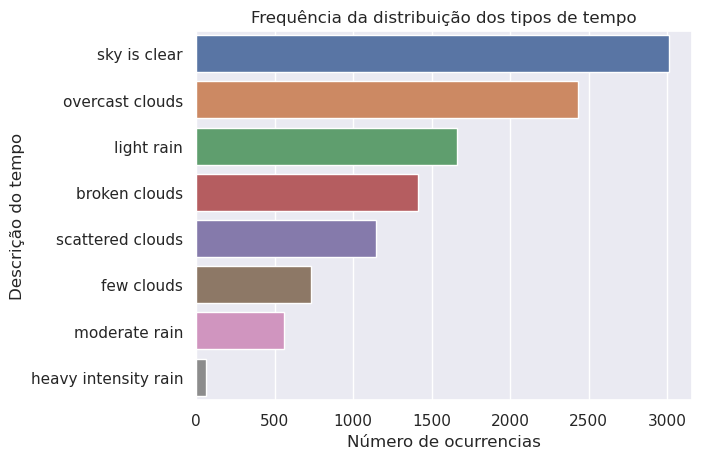

In [58]:
weather_count = df_train['weather_description'].value_counts()
sns.set(style='darkgrid')
sns.barplot(y=weather_count.index, x=weather_count.values)
plt.title('Frequência da distribuição dos tipos de tempo')
plt.xlabel('Número de ocurrencias', fontsize=12)
plt.ylabel('Descrição do tempo', fontsize=12)
plt.show()

In [59]:
from sklearn.preprocessing import LabelBinarizer

In [60]:
lb = LabelBinarizer()
lb_results=lb.fit_transform(df_train['weather_description'])
lbresults_df=pd.DataFrame(lb_results,columns=lb.classes_)

In [61]:
df_train=pd.concat([df_train,lbresults_df],axis=1)

In [62]:
df_train.head()

Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0           0.0                      0.0                0.0   
1           0.0                      0.0                0.0   
2           0.0                      0.0                0.0   
3           0.0                      0.0                0.0   
4           0.0                      0.0                0.0   

  Injeção na rede (kWh)   temp  feels_like  temp_min  temp_max  pressure  \
0                   NaN  13.97       13.54     11.45     14.04      1027   
1                   NaN  13.48       13.02     13.43     13.90      1028   
2                   NaN  12.93       12.47     12.72     13.43      1027   
3                   NaN  12.61       12.15     10.34     12.93      1027   
4                   NaN  12.61       12.17      9.79     12.93      1027   

   humidity  ...  date_day  date_hour  broken clouds few clouds  \
0        81  ...        29          0              0          0   
1        82  ...        29          1              0          0   
2        84  ...        29          2              0          0   
3        85  ...        29          3              0          0   
4        86  ...        29          4              0          0   

   heavy intensity rain  light rain  moderate rain  overcast clouds  \
0                     0           0              0                1   
1                     0           0              0                1   
2                     0           0              0                1   
3                     0           0              0                1   
4                     0           0              0                1   

   scattered clouds  sky is clear  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  

[5 rows x 26 columns]

In [63]:
replace_map = {'Injeção na rede (kWh)': {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}}

In [64]:
labels = df_train['Injeção na rede (kWh)'].astype('category').cat.categories.tolist()
replace_map_comp = {'Injeção na rede (kWh)': {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)
df_train.info()

{'Injeção na rede (kWh)': {'High': 1, 'Low': 2, 'Medium': 3, 'Very High': 4}}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    3239 non-null   object 
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  rain_1h                  2284 non-null   float64
 12  clouds_all               11016 non-null  int64  
 13

In [65]:
df_train.replace(replace_map_comp, inplace=True)

In [66]:
df_train.drop(['weather_description'], axis=1, inplace=True)

In [67]:
df_train['Injeção na rede (kWh)'].fillna(0, inplace=True)

In [68]:
print(df_train.isna().sum())

Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)         0
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
humidity                      0
wind_speed                    0
rain_1h                    8732
clouds_all                    0
date_year                     0
date_month                    0
date_day                      0
date_hour                     0
broken clouds                 0
few clouds                    0
heavy intensity rain          0
light rain                    0
moderate rain                 0
overcast clouds               0
scattered clouds              0
sky is clear                  0
dtype: int64


In [69]:
df_train['rain_1h'].fillna(0.0,inplace=True)

<Axes: >

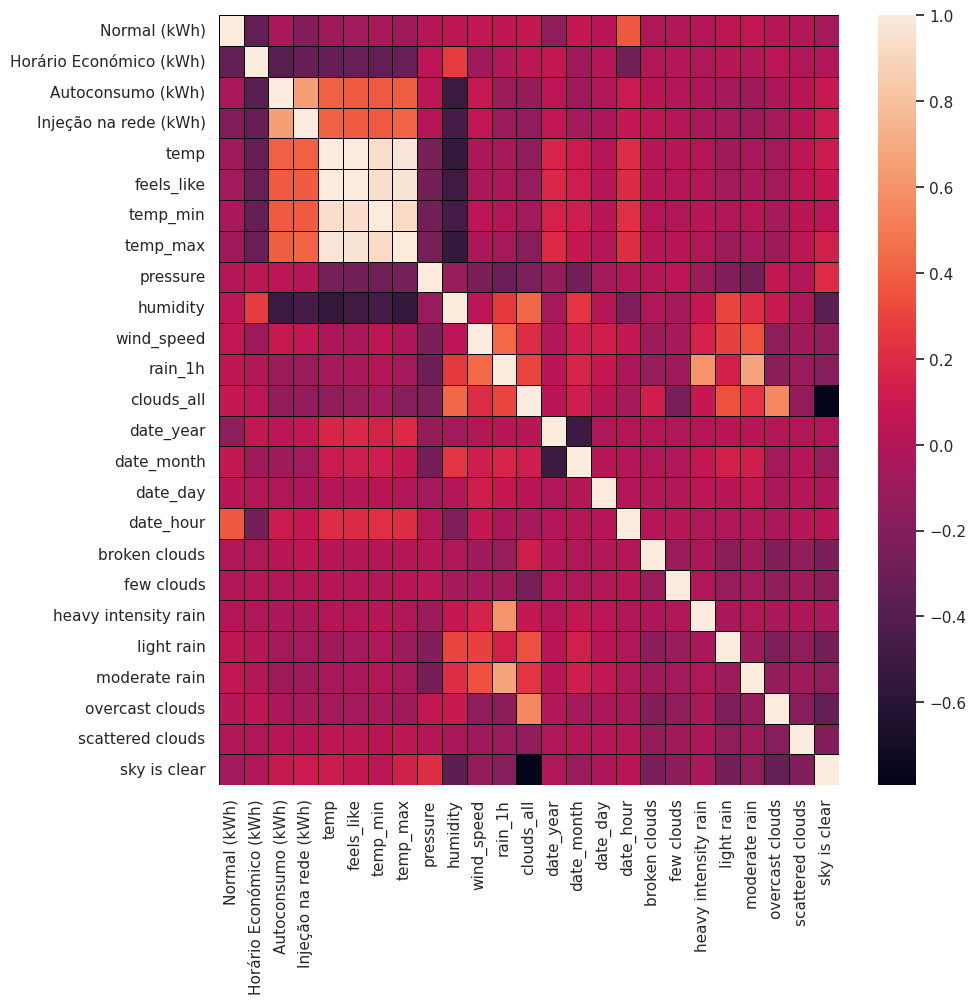

In [70]:
fig = plt.figure(figsize=(10,10))
inj_corr = df_train.corr(method='pearson')
sns.heatmap(inj_corr,linecolor='black',linewidth=0.5)

In [71]:
df_train.drop(['feels_like'], axis=1, inplace=True)
df_train.drop(['temp_min'], axis=1, inplace=True)
df_train.drop(['temp_max'], axis=1, inplace=True)

In [72]:
df_train_vis=df_train.copy()

In [73]:
df_train.drop(['broken clouds'], axis=1, inplace=True)
df_train.drop(['few clouds'], axis=1, inplace=True)
df_train.drop(['heavy intensity rain'], axis=1, inplace=True)
df_train.drop(['light rain'], axis=1, inplace=True)
df_train.drop(['moderate rain'], axis=1, inplace=True)
df_train.drop(['overcast clouds'], axis=1, inplace=True)
df_train.drop(['scattered clouds'], axis=1, inplace=True)
df_train.drop(['sky is clear'], axis=1, inplace=True)

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  float64
 4   temp                     11016 non-null  float64
 5   pressure                 11016 non-null  int64  
 6   humidity                 11016 non-null  int64  
 7   wind_speed               11016 non-null  float64
 8   clouds_all               11016 non-null  int64  
 9   date_year                11016 non-null  int32  
 10  date_month               11016 non-null  int32  
 11  date_day                 11016 non-null  int32  
 12  date_hour                11016 non-null  int64  
dtypes: float64(6), int32(3), int64(4)
memory usage: 989.8 KB


In [76]:
df_teste_v1.drop(['feels_like'], axis=1, inplace=True)
df_teste_v1.drop(['temp_min'], axis=1, inplace=True)
df_teste_v1.drop(['temp_max'], axis=1, inplace=True)
df_teste_v1.drop(['weather_description'], axis=1, inplace=True)

In [82]:
df_teste_v1.drop(['rain_1h'], axis=1, inplace=True)
df_train.drop(['rain_1h'], axis=1, inplace=True)

In [78]:
df_teste_v1 = df_teste_v1.rename(columns={'temp_x': 'temp'})

In [80]:
df_teste_v1 = df_teste_v1.rename(columns={'humidity_x': 'humidity'})

In [83]:
df_teste_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2255 non-null   float64
 4   pressure                 1752 non-null   float64
 5   humidity                 2255 non-null   float64
 6   wind_speed               2255 non-null   float64
 7   clouds_all               2255 non-null   float64
 8   date_year                2256 non-null   int32  
 9   date_month               2256 non-null   int32  
 10  date_day                 2256 non-null   int32  
 11  date_hour                2256 non-null   int64  
dtypes: float64(8), int32(3), int64(1)
memory usage: 185.2 KB


/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


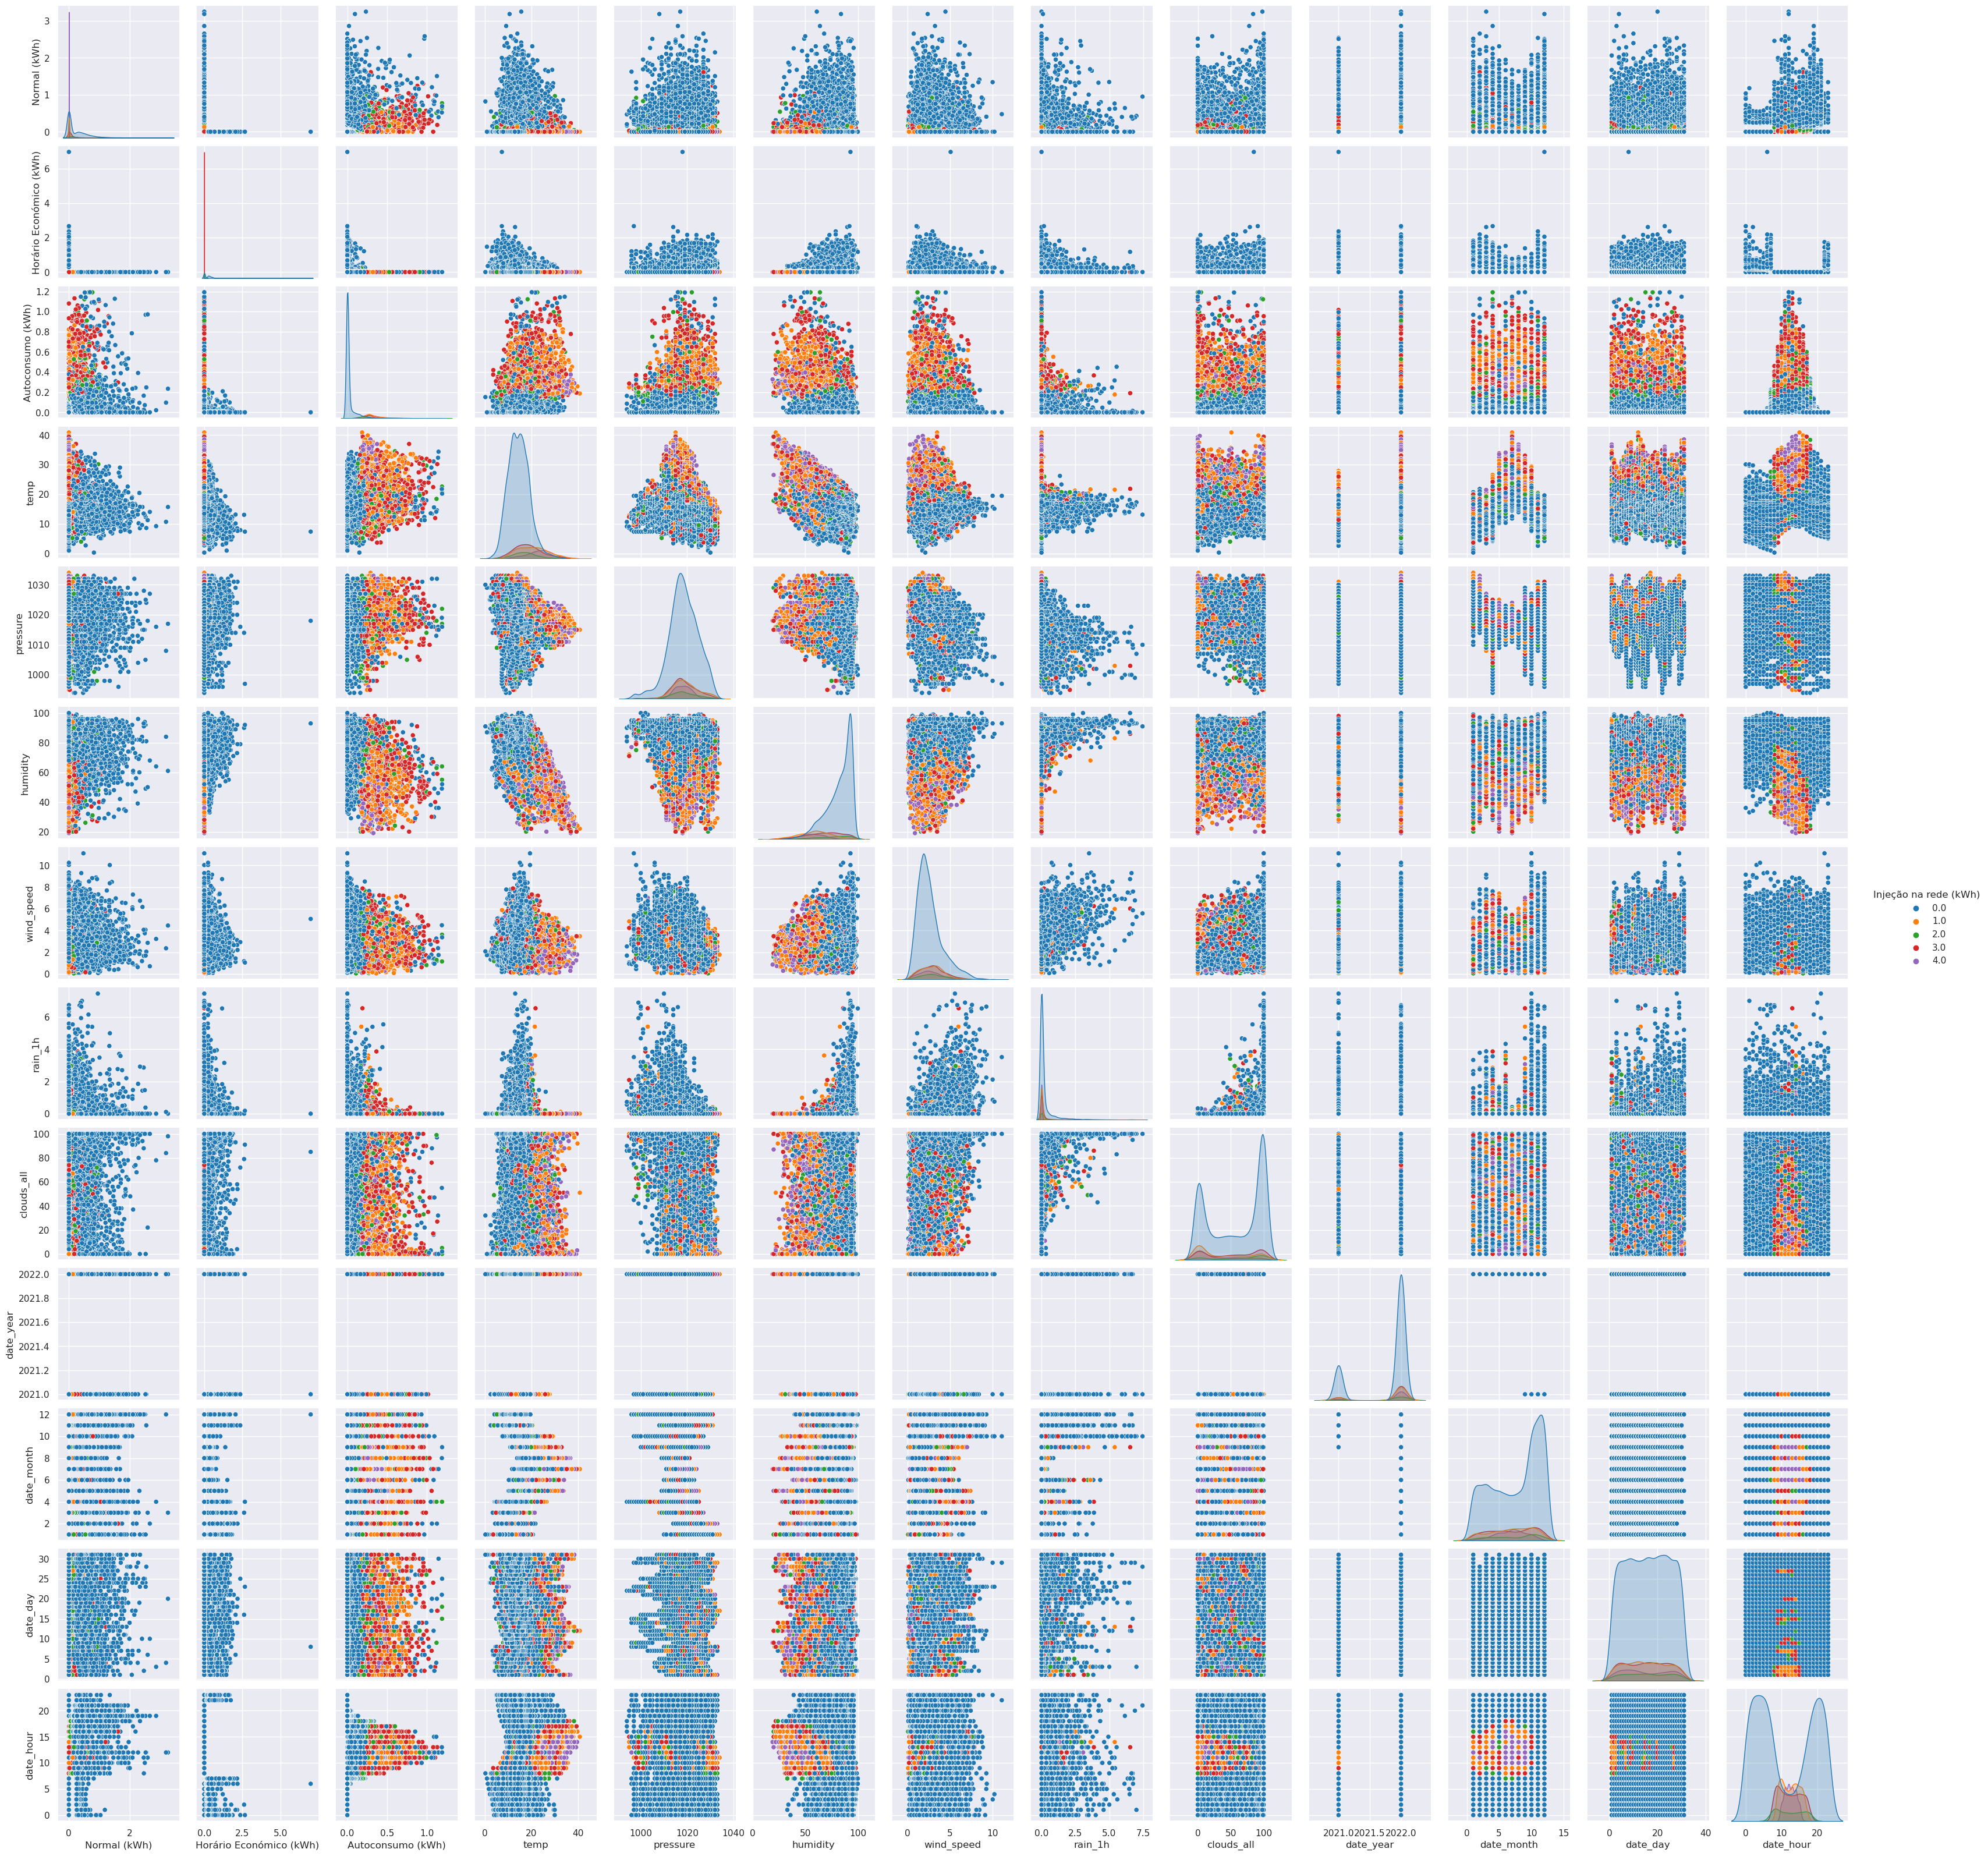

In [49]:
sns.pairplot(df_train,hue="Injeção na rede (kWh)",palette="tab10")

## Testes

In [87]:
from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.metrics import make_scorer,accuracy_score

### Decision

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
param_grid_dt={'criterion':['gini','entropy'],'max_depth':[5,6,7]}
estimator_dt=DecisionTreeClassifier(random_state=2023)
grid_dt=GridSearchCV(estimator_dt,param_grid_dt,refit=True,verbose=2)

In [91]:
X_train = df_train.drop(['Injeção na rede (kWh)'],axis=1)

In [92]:
y_train = df_train['Injeção na rede (kWh)'].to_frame()

In [95]:
X_teste = df_teste_v1.copy()

In [93]:
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................criterion=gini, max_depth=5; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, 

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2023),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7]},
             verbose=2)

In [94]:
best_params = grid_dt.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 6}

In [96]:
predictions2 = grid_dt.predict(X_teste)

# Escrever ficheiro

In [97]:
predictions_tofile=pd.DataFrame(predictions2)

In [98]:
predictions_tofile.index = predictions_tofile.index + 1
predictions_tofile['RowId'] = predictions_tofile.index

In [99]:
predictions_tofile.columns = ['Result','RowId']

In [100]:
replace_map_final = {0:'None', 1: 'Low', 2: 'Medium',3: 'High',4: 'Very High'}

In [101]:
predictions_tofile['Result'] = predictions_tofile['Result'].map(replace_map_final)

In [103]:
predictions_tofile.to_csv('res6.csv', index=False, sep=',', columns=['RowId','Result'])